# Name : Romit Bonkar


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, QuantileTransformer, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1=pd.read_excel('VolveData_Project.xlsx',sheet_name='well 14')
df2=pd.read_excel('VolveData_Project.xlsx',sheet_name='well 15')

In [3]:
df=pd.concat([df1,df2],axis=0)

In [4]:
df.head()

,Depth,Well,GR,RT,RHOB,NPHI,Facies
0,3178.5,14,50.2190,0.5888,2.3296,0.3657,SH
1,3179.0,14,47.2468,0.7768,2.3170,0.3776,UN
2,3179.5,14,49.5247,1.0707,2.2960,0.5390,SH
3,3180.0,14,44.9124,1.4460,2.2514,0.5482,UN
4,3180.5,14,47.0048,0.9542,2.2733,0.5076,UN


In [5]:
df.drop(columns=['Well','Depth'],inplace=True)

# 3 New Features

In [6]:
# New Feature 1:
df['RHOB_Cross'] = df['RHOB'] * df['RHOB']

# New Feature 2:
df['Log_GR'] =  np.log10(df.GR)

# New Feature 3:
df['RT_NPHI_Ratio'] = df['RT'] / df['NPHI']

In [7]:
df.head()

,GR,RT,RHOB,NPHI,Facies,RHOB_Cross,Log_GR,RT_NPHI_Ratio
0,50.2190,0.5888,2.3296,0.3657,SH,5.427036,1.700868,1.610063
1,47.2468,0.7768,2.3170,0.3776,UN,5.368489,1.674372,2.057203
2,49.5247,1.0707,2.2960,0.5390,SH,5.271616,1.694822,1.986456
3,44.9124,1.4460,2.2514,0.5482,UN,5.068802,1.652366,2.637723
4,47.0048,0.9542,2.2733,0.5076,UN,5.167893,1.672142,1.879827


In [8]:
df.Facies.value_counts()

CB    1249
SS     997
SH     871
UN     124
Name: Facies, dtype: int64

In [9]:
df.isna().any() #check if NaN are present

GR               False
RT               False
RHOB             False
NPHI             False
Facies           False
RHOB_Cross       False
Log_GR           False
RT_NPHI_Ratio    False
dtype: bool

In [10]:
# provide a list of items that should be considered as missing.
# using inplace to save the replacement of various missing values.

df.replace([np.inf, -np.inf, np.inf, -999, 999, '', " ", 'inf', 'NaN'], np.nan, inplace=True)

In [11]:
label_encoder = LabelEncoder()
df['facies']=label_encoder.fit_transform(df.Facies)

In [12]:
filename = 'fp_label.sav'

pickle.dump(label_encoder, open(filename, 'wb'))

In [13]:
df.columns

Index(['GR', 'RT', 'RHOB', 'NPHI', 'Facies', 'RHOB_Cross', 'Log_GR',
       'RT_NPHI_Ratio', 'facies'],
      dtype='object')

In [14]:
X=df[[ 'GR', 'RT', 'RHOB', 'NPHI', 'RHOB_Cross','Log_GR', 'RT_NPHI_Ratio']]
y=df['facies']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
from sklearn.ensemble import IsolationForest
out = IsolationForest(contamination = 0.05)
out.fit(X_train)
in_out=out.predict(X_train)
in_out

array([1, 1, 1, ..., 1, 1, 1])

In [16]:
X_train_i = X_train[in_out==1]
y_train_i = y_train[in_out==1]

In [17]:
X_test_i =X_test[out.predict(X_test)==1]
y_test_i =y_test[out.predict(X_test)==1]

In [18]:
filename = 'fp_out.sav'

pickle.dump(out, open(filename, 'wb'))

In [19]:
from sklearn.preprocessing import StandardScaler
scl= StandardScaler()
scl.fit(X_train_i)
X_train_s=scl.transform(X_train_i)
X_test_s=scl.transform(X_test_i)
X_test_s = pd.DataFrame(X_test_s, columns=[ 'GR', 'RT', 'RHOB', 'NPHI', 'RHOB_Cross','Log_GR', 'RT_NPHI_Ratio'])
X_train_s = pd.DataFrame(X_train_s, columns=[  'GR', 'RT', 'RHOB', 'NPHI', 'RHOB_Cross','Log_GR', 'RT_NPHI_Ratio'])

In [20]:
filename = 'fp_scl.sav'

pickle.dump(scl, open(filename, 'wb'))

In [21]:
# from scipy.stats import pearsonr

# # Calculate the correlation matrix
# correlation_matrix = np.corrcoef(X_train_s, rowvar=False)

# # Display the correlation matrix
# print("Correlation Matrix:")
# print(correlation_matrix)

# # # Check for collinearity between variable 0 and variable 1
# corr_coefficient, p_value = pearsonr(X_train_s, data[:, 1])


In [22]:
correlation_matrix = X_train_s.corr()

In [23]:
correlation_matrix

,GR,RT,RHOB,NPHI,RHOB_Cross,Log_GR,RT_NPHI_Ratio
GR,1.000000,-0.165205,-0.079832,0.744085,-0.088837,0.910827,-0.373321
RT,-0.165205,1.000000,0.171670,-0.270077,0.173140,-0.253542,0.788037
RHOB,-0.079832,0.171670,1.000000,-0.437107,0.999515,-0.181311,0.367917
NPHI,0.744085,-0.270077,-0.437107,1.000000,-0.441837,0.767623,-0.532012
RHOB_Cross,-0.088837,0.173140,0.999515,-0.441837,1.000000,-0.189292,0.374232
Log_GR,0.910827,-0.253542,-0.181311,0.767623,-0.189292,1.000000,-0.532541
RT_NPHI_Ratio,-0.373321,0.788037,0.367917,-0.532012,0.374232,-0.532541,1.000000


<Axes: >

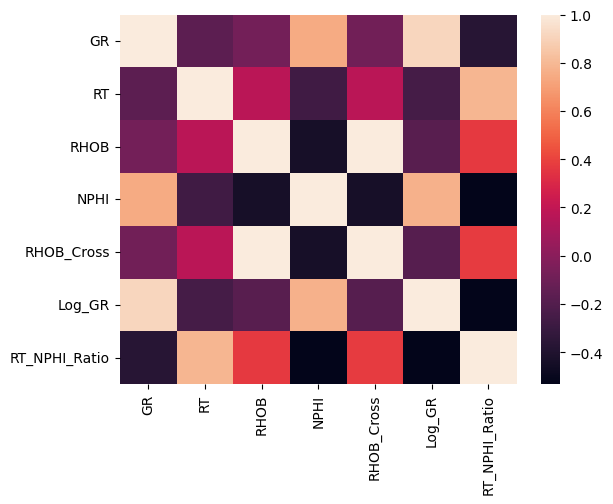

In [24]:
sns.heatmap(correlation_matrix)

In [25]:
corr_matrix = X_train_s.corr().abs()

# Select upper triangle of correlation matrix
upper = correlation_matrix.where(np.tril(np.ones(correlation_matrix.shape), k=-1).astype(bool))

# Find features with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# # Drop features 
# df.drop(to_drop, axis=1, inplace=True)

In [26]:
to_drop

['GR', 'RHOB']

In [27]:
filename = 'fp_noncol.sav'

pickle.dump(to_drop, open(filename, 'wb'))

In [28]:
X_train_no_collinearity=X_train_s.drop(to_drop, axis=1)
X_test_no_collinearity=X_test_s.drop(to_drop, axis=1)

In [29]:
from sklearn.feature_selection import mutual_info_regression,f_regression

mi = mutual_info_regression(X_train_no_collinearity, y_train_i)
mi /= np.max(mi)

In [30]:
f_test, p = f_regression(X_train_no_collinearity, y_train_i)
f_test /= np.max(f_test) # normalize f value


In [31]:
filename = 'fp_mi.sav'

pickle.dump(mi, open(filename, 'wb'))

In [32]:
filename = 'fp_ftest.sav'

pickle.dump(f_test, open(filename, 'wb'))

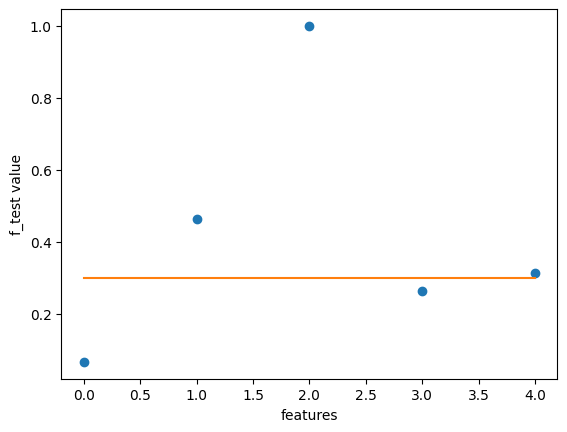

In [33]:
plt.figure()
plt.plot(f_test, 'o')
plt.plot(0.3*np.ones(len(f_test)))
plt.ylabel('f_test value')
plt.xlabel('features')
plt.show()
## find the threshold

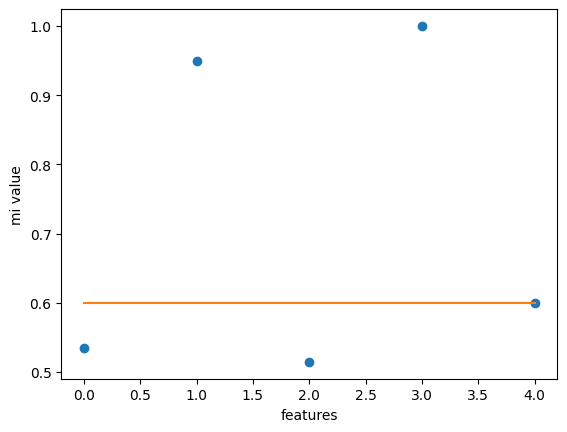

In [34]:
plt.figure()
plt.plot(mi, 'o')
plt.plot(0.6*np.ones(len(mi)))
plt.ylabel('mi value')
plt.xlabel('features')
plt.show()

In [35]:
# X_train_mi = X_train_no_collinearity.iloc[:,(mi > .6)]
# X_test_mi = X_test_no_collinearity.iloc[:,(mi > 0.6)]
# X_train_mi.shape

In [36]:
X_train_f = X_train_no_collinearity.loc[:,(f_test > 0.3) | (mi > 0.6)] #### Feature Selection using f values (f>0.3) or MI values (mi>0.2)]

X_train_f

,NPHI,RHOB_Cross,Log_GR,RT_NPHI_Ratio
0,0.250290,-1.641669,0.020233,1.207959
1,0.328643,1.375018,1.039501,-0.463344
2,0.466544,0.427863,1.200741,-0.348726
3,1.018148,-1.060612,0.610037,-0.612813
4,-0.139385,-0.165211,0.628399,-0.428065
...,...,...,...,...
2457,0.667127,-2.299745,-0.129839,-0.643139
2458,-0.034915,-1.242183,-0.139398,-0.605345
2459,-0.668006,0.244731,-0.170580,-0.162788
2460,-0.674275,0.171268,-1.446293,-0.192104


In [37]:
X_test_f=X_test_no_collinearity.loc[:,(f_test > 0.3) | (mi > 0.6)]


In [38]:
X_test_f

,NPHI,RHOB_Cross,Log_GR,RT_NPHI_Ratio
0,4.428066,0.366859,1.149991,-0.592079
1,-1.165286,1.026263,-1.055042,1.149029
2,-0.844562,0.376400,-0.976413,-0.188526
3,1.630345,-0.734387,0.458026,-0.578698
4,-0.061033,-1.480037,0.056814,-0.596403
...,...,...,...,...
611,1.433941,-1.320567,0.512503,-0.637932
612,0.256558,-0.343717,-1.219523,-0.496511
613,0.720407,0.063441,1.194750,-0.492921
614,-0.291912,1.033102,0.267878,-0.332519


In [39]:
transformer = QuantileTransformer(output_distribution='normal')

In [40]:
X_train_tf=transformer.fit_transform(X_train_f)
X_test_tf=transformer.transform(X_test_f)


In [41]:
filename = 'fp_qt.sav'

pickle.dump(transformer, open(filename, 'wb'))

# Logistic Regression 

In [42]:
lr_model = LogisticRegression(max_iter=1000)

# Fit the model
lr_model.fit(X_train_tf, y_train_i)

LogisticRegression(max_iter=1000)

In [43]:
filename = 'fp_lr.sav'

pickle.dump(lr_model, open(filename, 'wb'))

# KNN

In [44]:
# 3.2 K-Nearest Neighbor
knn_model = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn_model, knn_params, cv=5, scoring='f1_macro', n_jobs=-1)
knn_grid.fit(X_train_tf, y_train_i)
knn_best_model = knn_grid.best_estimator_


In [45]:
filename = 'fp_knn.sav'

pickle.dump(knn_best_model, open(filename, 'wb'))

# Gradient Boost

In [46]:
# 3.3 Gradient Boosting Classifier
gb_model = GradientBoostingClassifier()
gb_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='f1_macro', n_jobs=-1)
gb_grid.fit(X_train_tf, y_train_i)
gb_best_model = gb_grid.best_estimator_


In [47]:
filename = 'fp_gbr.sav'

pickle.dump(gb_best_model, open(filename, 'wb'))

# Adaboost 

In [48]:
adaboost_model = AdaBoostClassifier()
adaboost_params = {'n_estimators': [50, 100, 150], 'learning_rate': [0.01, 0.1, 0.2]}
adaboost_grid = GridSearchCV(adaboost_model, adaboost_params, cv=5, scoring='f1_macro', n_jobs=-1)
adaboost_grid.fit(X_train_tf, y_train_i)
adaboost_best_model = adaboost_grid.best_estimator_

In [49]:
filename = 'fp_ada.sav'

pickle.dump(adaboost_best_model, open(filename, 'wb'))

# Gaussian Naive Bayes

In [50]:
nb_model = GaussianNB()
nb_params = {}  # No hyperparameters to tune for Gaussian Naive Bayes
nb_best_model = nb_model
nb_best_model.fit(X_train_tf, y_train_i)

GaussianNB()

In [51]:
filename = 'fp_nb.sav'

pickle.dump(nb_best_model, open(filename, 'wb'))

# Support Vector Machine

In [52]:
svm_model = SVC()
svm_params = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5, scoring='f1_macro', n_jobs=-1)
svm_grid.fit(X_train_tf, y_train_i)
svm_best_model = svm_grid.best_estimator_

In [53]:
filename = 'fp_svm.sav'

pickle.dump(svm_best_model, open(filename, 'wb'))

# Random Forest

In [54]:
rf_model = RandomForestClassifier()
rf_params = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='f1_macro', n_jobs=-1)
rf_grid.fit(X_train_tf, y_train_i)
rf_best_model = rf_grid.best_estimator_

In [55]:
filename = 'fp_rf.sav'

pickle.dump(rf_best_model, open(filename, 'wb'))

# Neural Network

In [56]:
nn_model = MLPClassifier(max_iter=1000)
nn_params = {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
nn_grid = GridSearchCV(nn_model, nn_params, cv=5, scoring='f1_macro', n_jobs=-1)
nn_grid.fit(X_train_tf, y_train_i)
nn_best_model = nn_grid.best_estimator_

In [57]:
filename = 'fp_nn.sav'

pickle.dump(nn_best_model, open(filename, 'wb'))

In [58]:
metrics_list = ['f1_score', 'roc_auc_score', 'matthews_corrcoef']

for model, name in [(lr_model, 'Logistic Regression'), (knn_best_model, 'K-Nearest Neighbor'),
                    (gb_best_model, 'Gradient Boosting'), (adaboost_best_model, 'Adaboost'),
                    (nb_best_model, 'Gaussian Naive Bayes'), (svm_best_model, 'Support Vector Machine'),
                    (rf_best_model, 'Random Forest'), (nn_best_model, 'Neural Network')]:
    y_pred = model.predict(X_test_tf)
    print(f"\nMetrics for {name}:")
    for metric in metrics_list:
        if metric == 'roc_auc_score':
            # ROC AUC does not support 'weighted' average
            if lr_model.classes_.shape[0] > 2:
                score = metrics.roc_auc_score(y_test_i, lr_model.predict_proba(X_test_tf), multi_class='ovr')
            else:
                score = metrics.roc_auc_score(y_test_i, lr_model.predict_proba(X_test_tf)[:, 1])
        elif metric == 'matthews_corrcoef':
            score = metrics.matthews_corrcoef(y_test_i, y_pred)
        
        else:
            score = getattr(metrics, metric)(y_test_i, y_pred, average='weighted')
        print(f"{metric}: {score}")


Metrics for Logistic Regression:
f1_score: 0.802475445981396
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.7272635953797265

Metrics for K-Nearest Neighbor:
f1_score: 0.85210961675114
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.7843562948205022

Metrics for Gradient Boosting:
f1_score: 0.8565997684125548
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.793069641900634

Metrics for Adaboost:
f1_score: 0.8386491632141801
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.762659736951

Metrics for Gaussian Naive Bayes:
f1_score: 0.789924831191675
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.6939273329702486

Metrics for Support Vector Machine:
f1_score: 0.841417496893115
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.7729327470019598

Metrics for Random Forest:
f1_score: 0.8575876426057326
roc_auc_score: 0.929616000157632
matthews_corrcoef: 0.7935971768892174

Metrics for Neural Network:
f1_score: 0.8509330705065214
roc_auc_score: 0.9296160001576

The metrics mentioned (F1 Score, Area under the Curve (AUC), and Matthews correlation coefficient (MCC)) do consider class imbalance to some extent, but each has its characteristics.

F1 Score:

F1 Score is the harmonic mean of precision and recall. It is effective in scenarios where there is an uneven class distribution because it balances false positives and false negatives.
However, F1 Score does not consider true negatives, which might be important in certain contexts.
Area under the Curve (AUC):

AUC is often used in binary classification problems, and it represents the ability of the model to distinguish between positive and negative classes.
AUC can be a good metric for imbalanced datasets, as it considers both true positive rate (sensitivity) and false positive rate.
Matthews Correlation Coefficient (MCC):

MCC takes into account true positives, true negatives, false positives, and false negatives, providing a balanced measure even for imbalanced datasets.
MCC ranges from -1 (perfect negative correlation) to +1 (perfect positive correlation), with 0 indicating no correlation.
While these metrics do account for class imbalance, the choice of the "best" metric depends on the specific characteristics of your dataset and the goals of your classification task. In imbalanced datasets, F1 Score and MCC are often preferred as they provide a balanced assessment of model performance across different classes.

### But for our project I think F1 is the best metric



Confusion Matrix for Logistic Regression:
[[195   1  43   0]
 [  6 151   2   3]
 [ 30   5 155   0]
 [  4  10  10   1]]


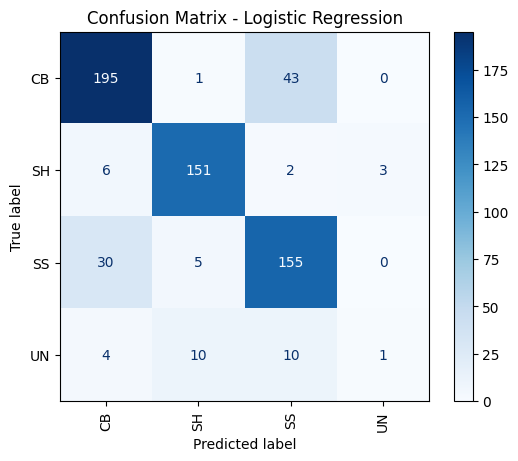


Confusion Matrix for K-Nearest Neighbor:
[[205   0  33   1]
 [  2 147   5   8]
 [ 21   4 163   2]
 [  2   4   9  10]]


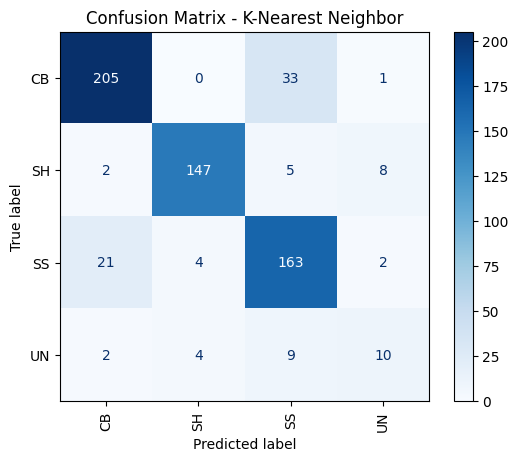


Confusion Matrix for Gradient Boosting:
[[203   1  34   1]
 [  1 154   2   5]
 [ 25   0 163   2]
 [  4   5   7   9]]


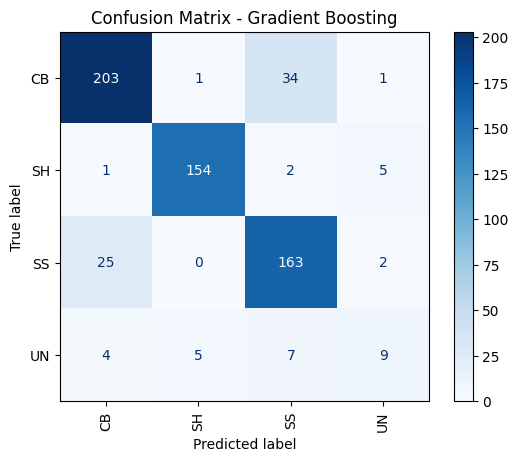


Confusion Matrix for Adaboost:
[[191   1  43   4]
 [  2 143   3  14]
 [ 15   4 168   3]
 [  4   2   7  12]]


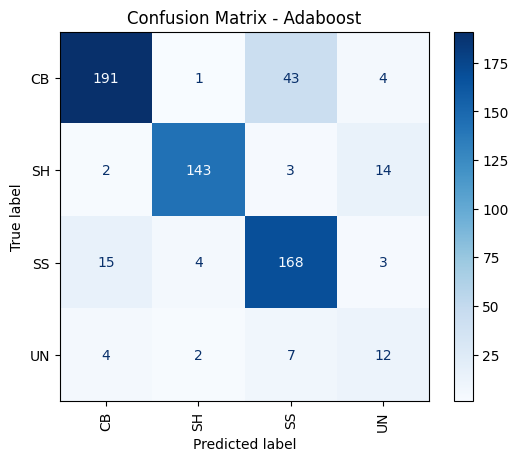


Confusion Matrix for Gaussian Naive Bayes:
[[185   0  53   1]
 [  9 142   0  11]
 [ 31   5 153   1]
 [  4   7   7   7]]


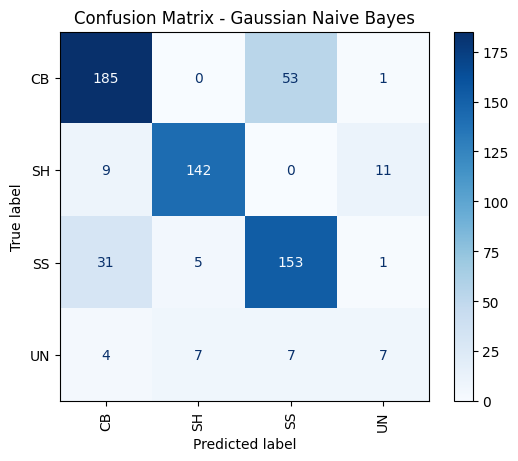


Confusion Matrix for Support Vector Machine:
[[206   1  31   1]
 [  2 153   3   4]
 [ 30   3 155   2]
 [  5   7   6   7]]


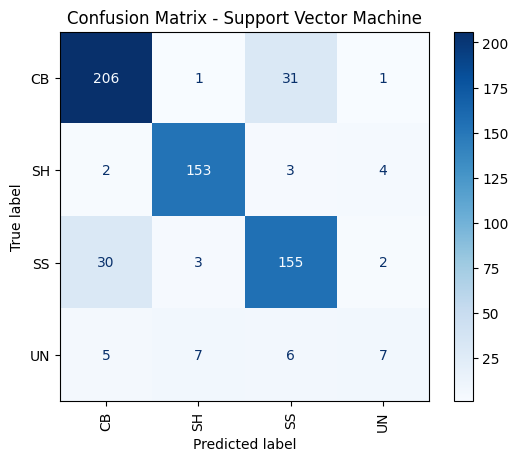


Confusion Matrix for Random Forest:
[[202   1  34   2]
 [  0 156   3   3]
 [ 23   5 159   3]
 [  4   4   5  12]]


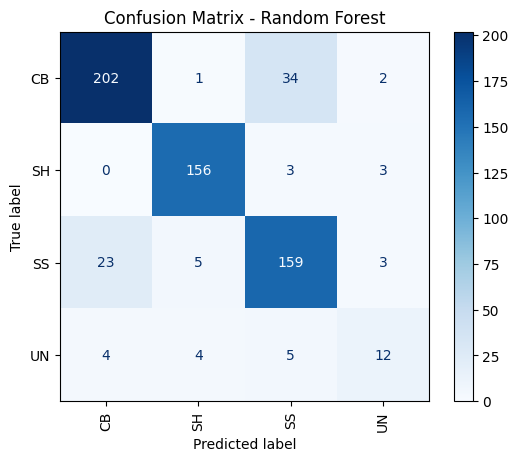


Confusion Matrix for Neural Network:
[[205   1  31   2]
 [  1 153   2   6]
 [ 29   2 157   2]
 [  3   5   7  10]]


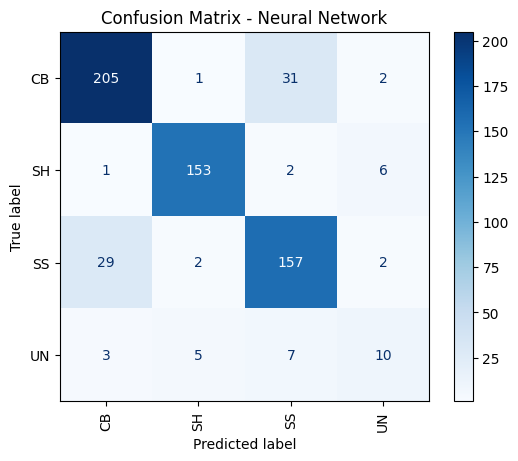

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score,f1_score,accuracy_score

for model, name in [(lr_model, 'Logistic Regression'), (knn_best_model, 'K-Nearest Neighbor'),
                    (gb_best_model, 'Gradient Boosting'), (adaboost_best_model, 'Adaboost'),
                    (nb_best_model, 'Gaussian Naive Bayes'), (svm_best_model, 'Support Vector Machine'),
                    (rf_best_model, 'Random Forest'), (nn_best_model, 'Neural Network')]:
    y_pred = model.predict(X_test_tf)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_i, y_pred)
    print(f"\nConfusion Matrix for {name}:\n{cm}")
#     precision = precision_score(y_test_i, y_pred,average='weighted')
#     recall = recall_score(y_test_i, y_pred,average='weighted')
#     f1 = f1_score(y_test_i, y_pred,average=None)
#     accuracy = accuracy_score(y_test_i, y_pred)
#     threshold = 0.8

#     easily_predicted_f1 = f1.argmax()
#     hard_to_predict_f1 = 0

#     print("\nEasily Predicted Classes:")
#     print(easily_predicted_f1)
#     print("\nHard to Predict Classes:")
#     print(hard_to_predict_f1)
    # Display Confusion Matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap='Blues', values_format='d', xticks_rotation='vertical', ax=plt.gca())
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

In [60]:
# Assume you have already run the previous code to train and evaluate models

# Function to find easiest and hardest labels for a given model
def find_easy_hard_labels(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test_i, y_pred)
    
    # Calculate accuracy for each class
    class_accuracies = cm.diagonal() / cm.sum(axis=1)
    
    # Find the index of the easiest and hardest labels
    easiest_label = np.argmax(class_accuracies)
    hardest_label = np.argmin(class_accuracies)
    
    return easiest_label, hardest_label

# Find easiest and hardest labels for each model

for model, name in [(lr_model, 'Logistic Regression'), (knn_best_model, 'K-Nearest Neighbor'),
                    (gb_best_model, 'Gradient Boosting'), (adaboost_best_model, 'Adaboost'),
                    (nb_best_model, 'Gaussian Naive Bayes'), (svm_best_model, 'Support Vector Machine'),
                    (rf_best_model, 'Random Forest'), (nn_best_model, 'Neural Network')]:
    
    easiest_label, hardest_label = find_easy_hard_labels(model, X_test_tf, y_test)
    print(f"\nModel: {name}")
    print(f"Easiest Label: {label_encoder.classes_[easiest_label]}")
    print(f"Hardest Label: {label_encoder.classes_[hardest_label]}")



Model: Logistic Regression
Easiest Label: SH
Hardest Label: UN

Model: K-Nearest Neighbor
Easiest Label: SH
Hardest Label: UN

Model: Gradient Boosting
Easiest Label: SH
Hardest Label: UN

Model: Adaboost
Easiest Label: SS
Hardest Label: UN

Model: Gaussian Naive Bayes
Easiest Label: SH
Hardest Label: UN

Model: Support Vector Machine
Easiest Label: SH
Hardest Label: UN

Model: Random Forest
Easiest Label: SH
Hardest Label: UN

Model: Neural Network
Easiest Label: SH
Hardest Label: UN



#### For our dataset based on the confusion matrix, SH is the easiest metric to detect and UN is the hardest to predict

In [61]:
f1_scores = {}

# Evaluate F1 Score for each model
for model, name in [(lr_model, 'Logistic Regression'), (knn_best_model, 'K-Nearest Neighbor'),
                    (gb_best_model, 'Gradient Boosting'), (adaboost_best_model, 'Adaboost'),
                    (nb_best_model, 'Gaussian Naive Bayes'), (svm_best_model, 'Support Vector Machine'),
                    (rf_best_model, 'Random Forest'), (nn_best_model, 'Neural Network')]:
    y_pred = model.predict(X_test_tf)
    f1 = metrics.f1_score(y_test_i, y_pred, average='macro')
    f1_scores[name] = f1

# Sort the models based on F1 Score in descending order
top_models = sorted(f1_scores.items(), key=lambda x: x[1], reverse=True)[:3]

# Display the top-performing models
print("\nTop 3 Performing Models:")
for model_name, f1_score in top_models:
    print(f"{model_name}: F1 Score - {f1_score:.4f}")


Top 3 Performing Models:
Random Forest: F1 Score - 0.7903
Gradient Boosting: F1 Score - 0.7671
Neural Network: F1 Score - 0.7657


# New Stuff

Let's explore and demonstrate the use of SHAP (SHapley Additive exPlanations) values, which is a powerful tool for interpreting machine learning models. SHAP values provide a way to explain the output of any machine learning model by attributing the prediction to different features.

In this demonstration, I'll use the Random Forest model from the previous examples and generate SHAP summary plots to understand the impact of each feature on the model's predictions.

In [63]:
pip install shap

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/f5/fc/e81722d6bec4fcba46e46ef895eddaeab0027ac71e78fc35ef351fac5fe4/shap-0.43.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tqdm>=4.27.0 from https://files.pythonhosted.org/packages/00/e5/f12a80907d0884e6dff9c16d0c0114d81b8cd07dc3ae54c5e962cc83037e/tqdm-4.66.1-py3-none-any.whl.metadata
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.6 kB ? eta -:--:--
     ---------------------------------------- 57.6/57.6 kB 1.5 MB/s eta 0:00:00
  Obtaining dependency information for numba from https://files.pythonhosted.org/packages/cd/59/5dd8a3059997ec1daf6f9f7c9b1aef7f0a9e23e1334a5774eae65cae6fd0/numba-0.58.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cloudpickle from https://files.pythonhosted.org/packag


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


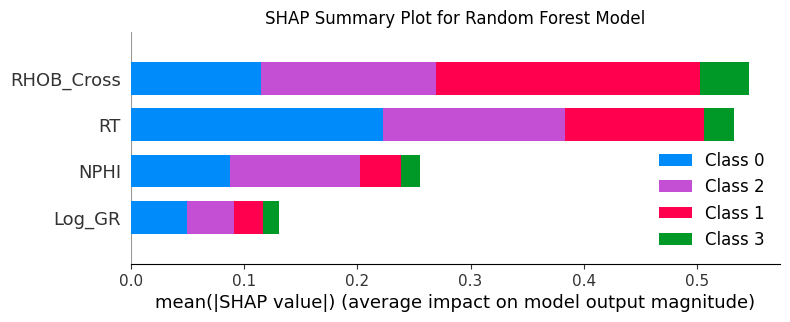

In [64]:
import shap

# Assume 'rf_best_model' is the best-performing Random Forest model from the previous examples
# Fit the SHAP explainer to the training data
explainer = shap.TreeExplainer(rf_best_model)
shap_values = explainer.shap_values(X_train_tf)

# Visualize the SHAP summary plot
shap.summary_plot(shap_values, X_train_tf, feature_names=X_train_no_collinearity.columns, show=False)
plt.title("SHAP Summary Plot for Random Forest Model")
#plt.savefig('shap_summary_plot.pdf')
plt.show()